## Exploratory Data Analysis of the 'Heart Diseases' dataset.
### Link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

Dataset addresses early detection of heart disease risk.

Features:
1. Age: patient's age in years
2. Sex: gender of the patient [M: Male, 1, K: Female, 0].
3. ChestPainType: type of chest pain [TA: typical angina 3, ATA: atypical angina 1, NAP: non angina pain 2, ASY: asymptomatic 0].
4. RestingBP: resting blood pressure [mm/Hg].
5. Cholesterol: serum cholesterol [mm/dl].
6. FastingBS: fasting blood sugar [1: if fasting BS > 120 mg/dl, 0: otherwise].
7. RestingECG: resting electrocardiogram results [Normal: normal 1, ST: 2 with abnormal ST-T wave (T-wave inversion and/or ST-segment elevation or depression > 0.05 mV), LVH: 0 indicating probable or definite left ventricular hypertrophy according to Estes Criterion].
8. MaxHR: maximum heart rate achieved [numeric value between 60 and 200].
9. ExerciseAngina: exertional angina [Y: Yes 1, N: No 0].
10. oldpeak: oldpeak = ST [Numeric value measured in depression].
11. ST_Slope: ST segment slope of peak exercise [Up: slope 2, flat: flat 1, down: slope down].
12. HeartDisease: baseline class [1: heart disease, 0: Normal] - there is heart disease or there is no heart disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
# load dataset
heart = pd.read_csv('heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### I rename the HeartDisease column to Outcome, as in other collections. 1 is a sick person, 0 is a healthy person.

In [3]:
heart.rename(columns={'HeartDisease' : 'Outcome'}, inplace=True)
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart.shape # 918 objects, 12 columns

(918, 12)

In [5]:
heart.columns.values # column names

array(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'Outcome'], dtype=object)

In [6]:
heart.duplicated().sum()

0

### No duplicates.

In [7]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
Outcome           0
dtype: int64

### No missing data.

In [8]:
heart.info() # check the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  Outcome         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### 5 values of type object.

In [9]:
categorical_columns = heart.select_dtypes(include=['object']).columns
# I change the data type 'object' to 'category' so that I can later use the cat.codes method
heart[categorical_columns] = heart[categorical_columns].astype('category')
# I change categorical values to numerical values
heart[categorical_columns] = heart[categorical_columns].apply(lambda x: x.cat.codes)
print(heart.info())
print(heart.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int8   
 2   ChestPainType   918 non-null    int8   
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int8   
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int8   
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int8   
 11  Outcome         918 non-null    int64  
dtypes: float64(1), int64(6), int8(5)
memory usage: 54.8 KB
None
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG   
0   40    1              1        140          289          0           1  \
1   49    0              2        160         

Sex:
* Male -> 1
* Famale -> 0

ChestPainType:
* TA: Typical Angina -> 3
* Non-Anginal -> 2
* ATA: Atypical Angina -> 1
* ASY: Asymptomic -> 0

RestingECG:
* ST: having ST-T wave abnormality -> 2
* Normal -> 1
* LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria -> 0

ExerciseAngina:
* Y: Yes -> 1
* N: No -> 0

ST_Slope: the slope of the peak exercise ST segment:
* Up: upsloping -> 2,
* Flat: flat -> 1
* Down: downsloping -> 0

Outcome:
* heart disease -> 1
* Normal -> 0

In [10]:
# division of data into numerical and categorical data
categorical = heart[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'Outcome']]
numerical = heart[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

In [11]:
numerical.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.51,9.43,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.40,18.51,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.80,109.38,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.81,25.46,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.89,1.07,-2.6,0.00,0.6,1.5,6.2


### Statistics:
* For RestingBP and Cholesterol the minimum value is zero. I'll have to check it out later.
* Age -> people from 28 to 77 years old.
* RestingBP -> 0 to max 200
* Cholesterol -> 0 to max 603.
* MaxHR -> 60 to max. 202.
* Oldpeak -> -2.6 to 6.2.

In [12]:
heart.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
Outcome             2
dtype: int64

In [13]:
np.sort(heart['MaxHR'].unique())

array([ 60,  63,  67,  69,  70,  71,  72,  73,  77,  78,  80,  82,  83,
        84,  86,  87,  88,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 190, 192, 194,
       195, 202], dtype=int64)

In [14]:
heart.Outcome.value_counts() # 508 people with heart disease, 410 healthy people

Outcome
1    508
0    410
Name: count, dtype: int64

In [15]:
heart.Outcome.value_counts(normalize = True).round(2) # %

Outcome
1    0.55
0    0.45
Name: proportion, dtype: float64

<Axes: xlabel='Outcome', ylabel='count'>

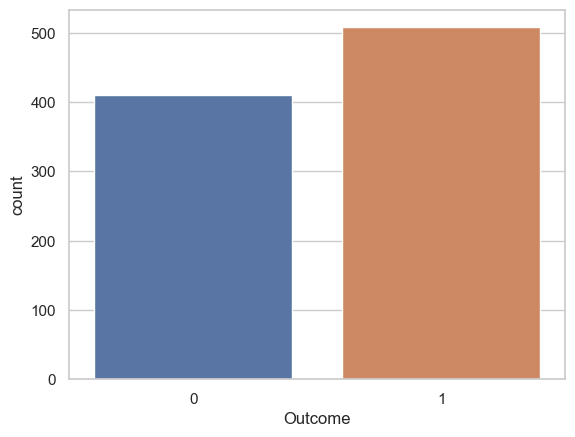

In [16]:
sns.countplot(x ='Outcome', data = heart)

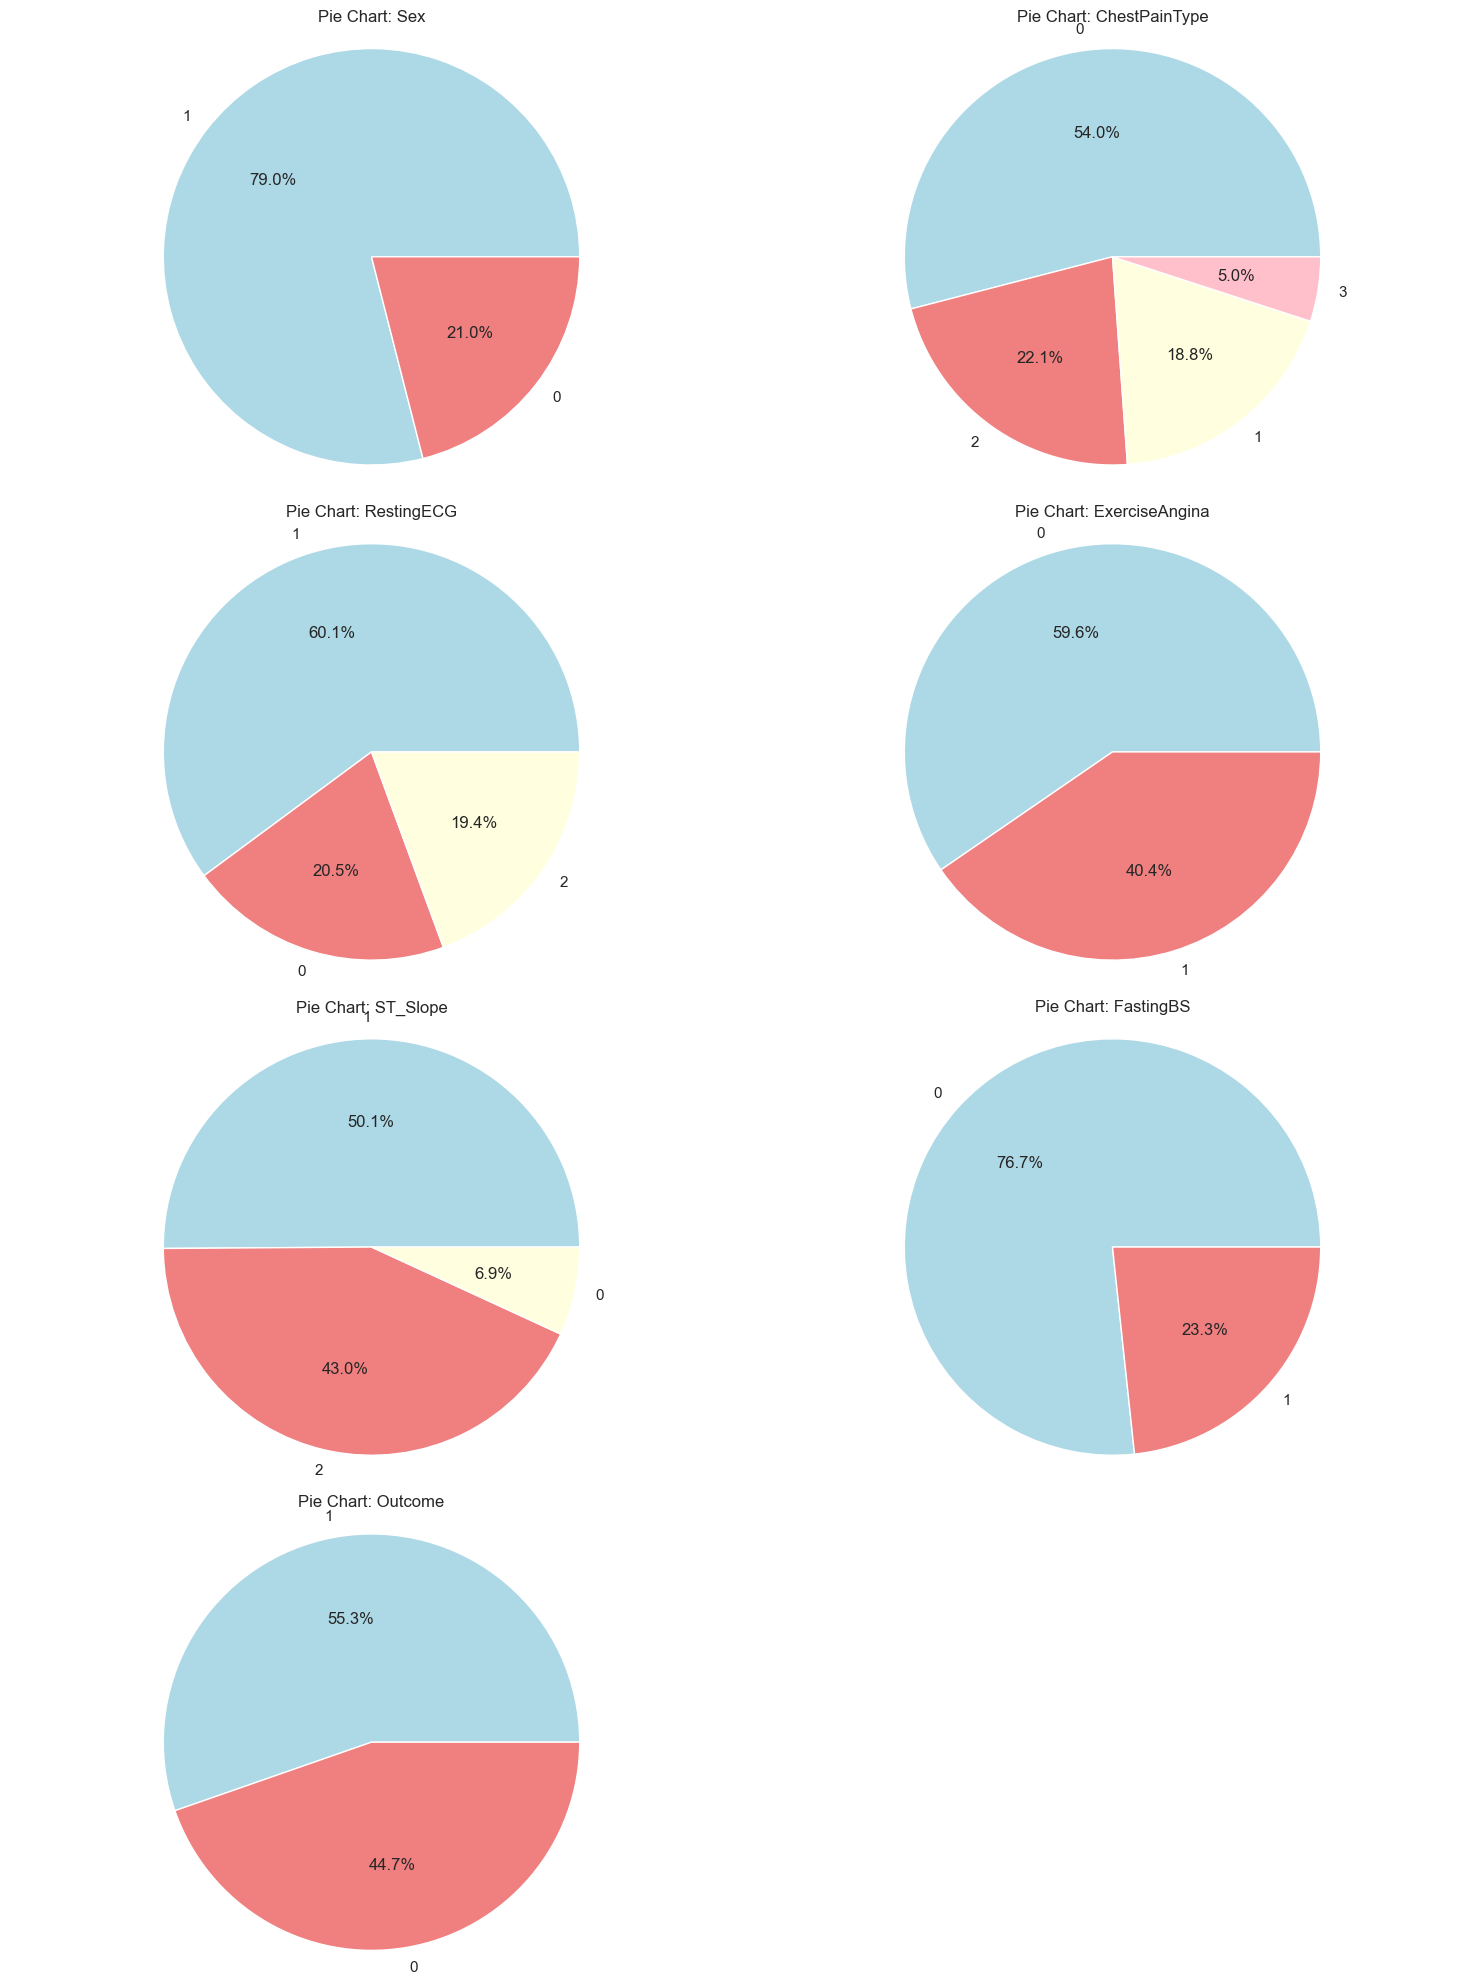

In [17]:
num_columns = len(categorical.columns)
num_rows = num_columns // 2 + num_columns % 2
plt.figure(figsize=(15, num_rows * 5))

for idx, column in enumerate(categorical.columns):
    plt.subplot(num_rows, 2, idx + 1)
    category_counts = categorical[column].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightyellow', 'pink'])
    plt.title(f'Pie Chart: {column}')
    plt.axis('equal')

plt.tight_layout()

In [18]:
heart.Sex.value_counts() # 725 men, 193 women

Sex
1    725
0    193
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

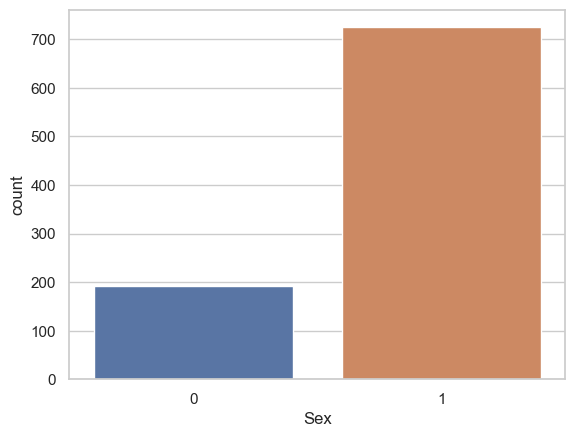

In [19]:
sns.countplot(x = 'Sex', data = heart)

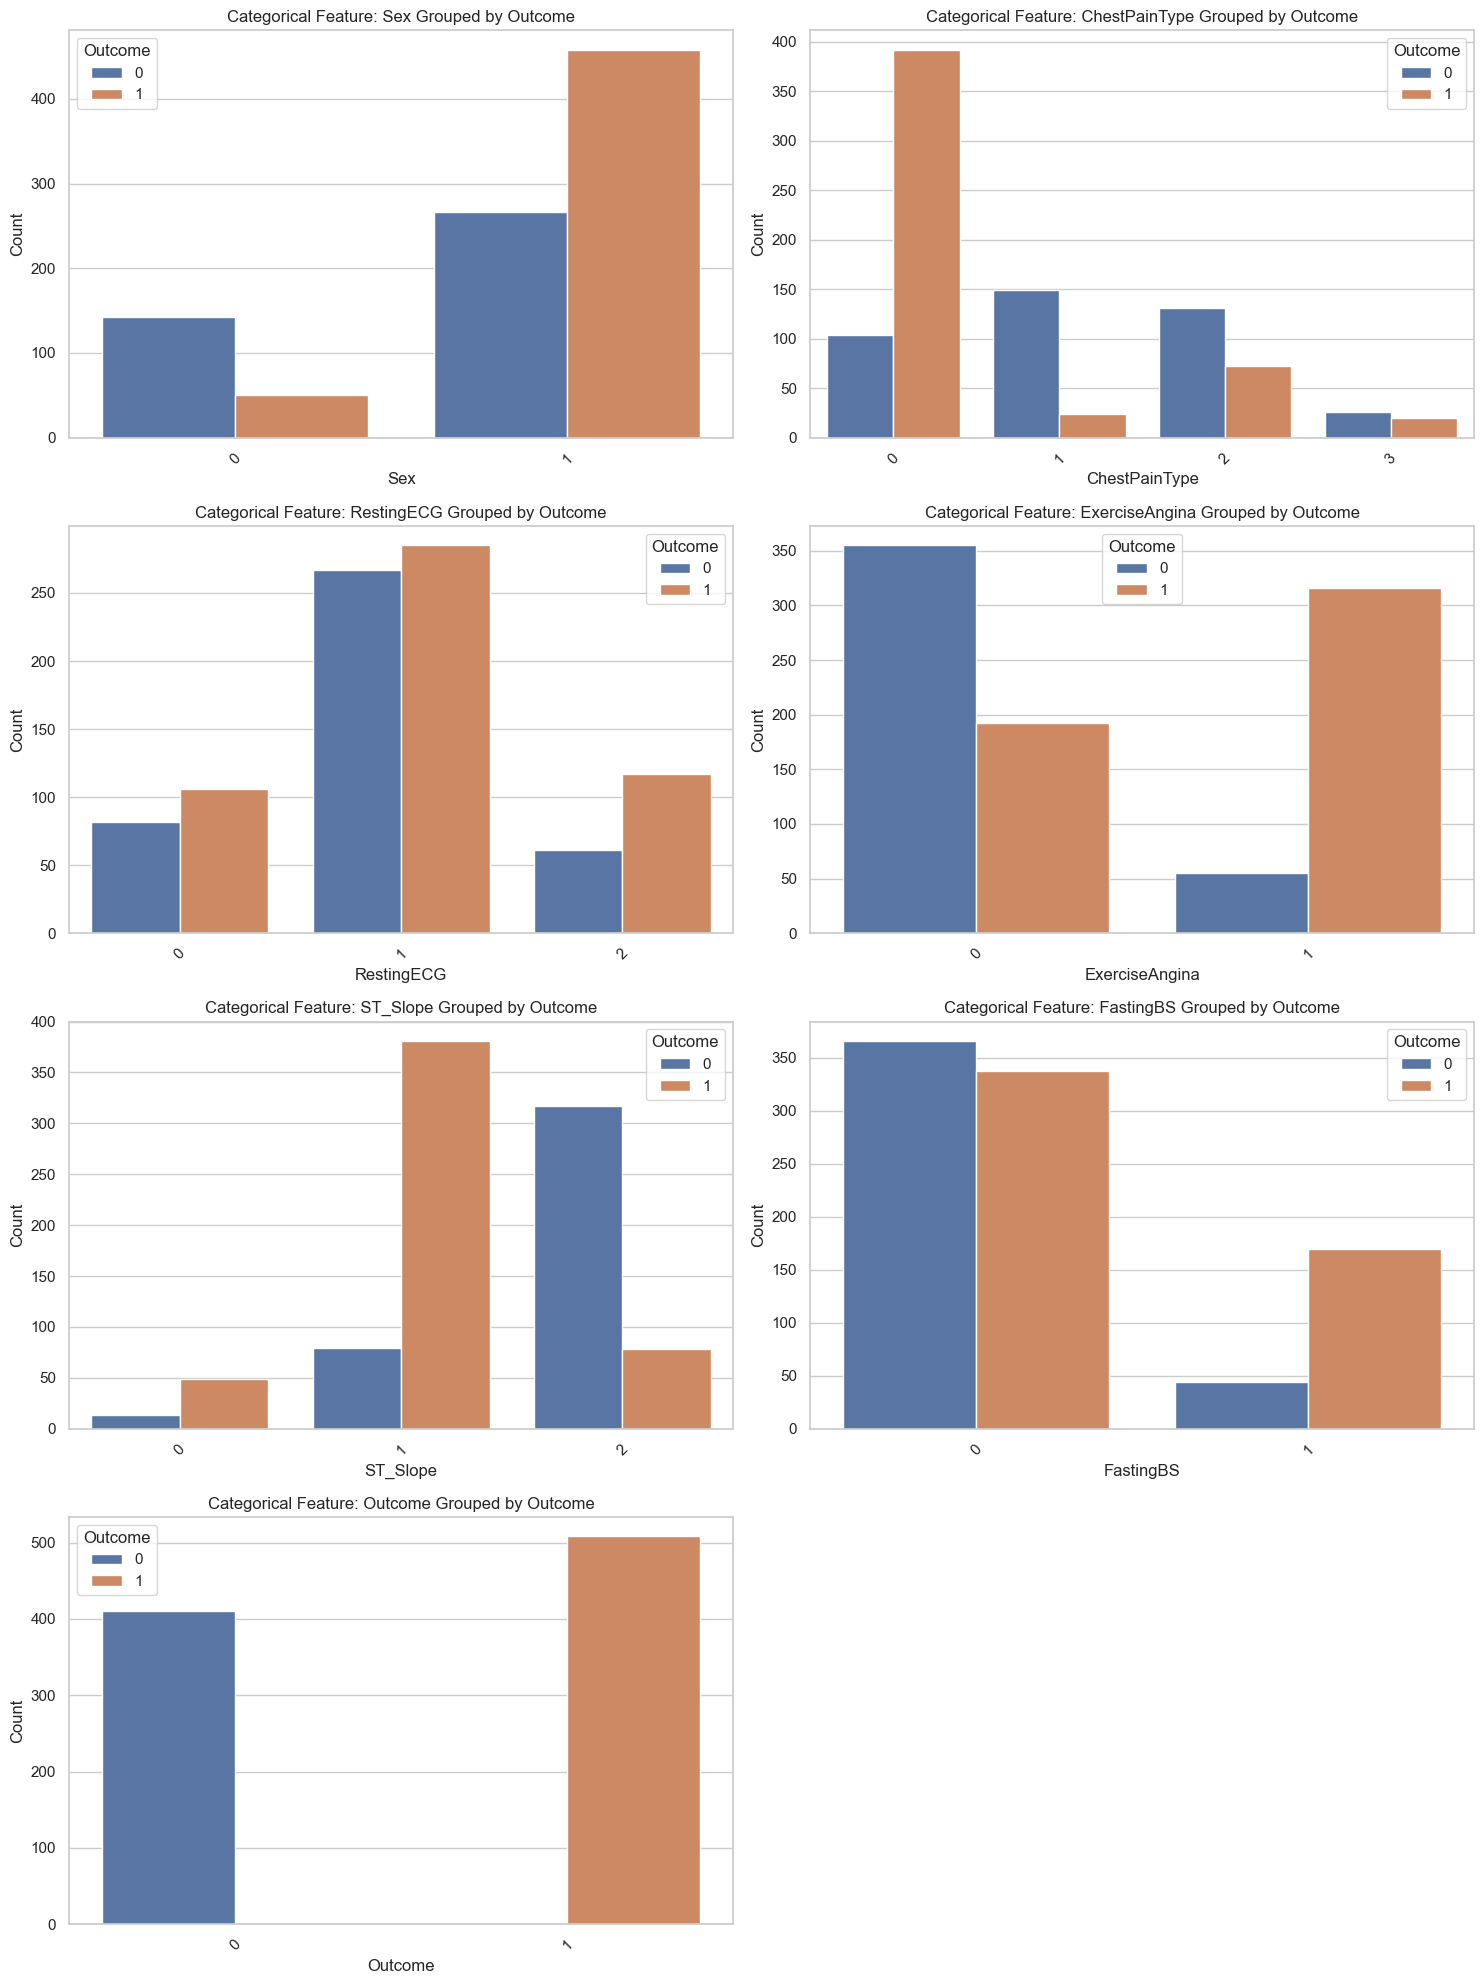

In [20]:
num_columns = len(categorical.columns)
num_rows = num_columns // 2 + num_columns % 2

plt.figure(figsize=(15, num_rows * 5))

for idx, column in enumerate(categorical.columns):
    plt.subplot(num_rows, 2, idx+1)
    sns.countplot(data=categorical, x=column, hue='Outcome')
    plt.title(f'Categorical Feature: {column} Grouped by Outcome')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Outcome')

plt.tight_layout()

### Zero values.

In [21]:
numerical.isin({0}).sum()

Age              0
RestingBP        1
Cholesterol    172
MaxHR            0
Oldpeak        368
dtype: int64

(0.0, 1.0, 0.0, 1.0)

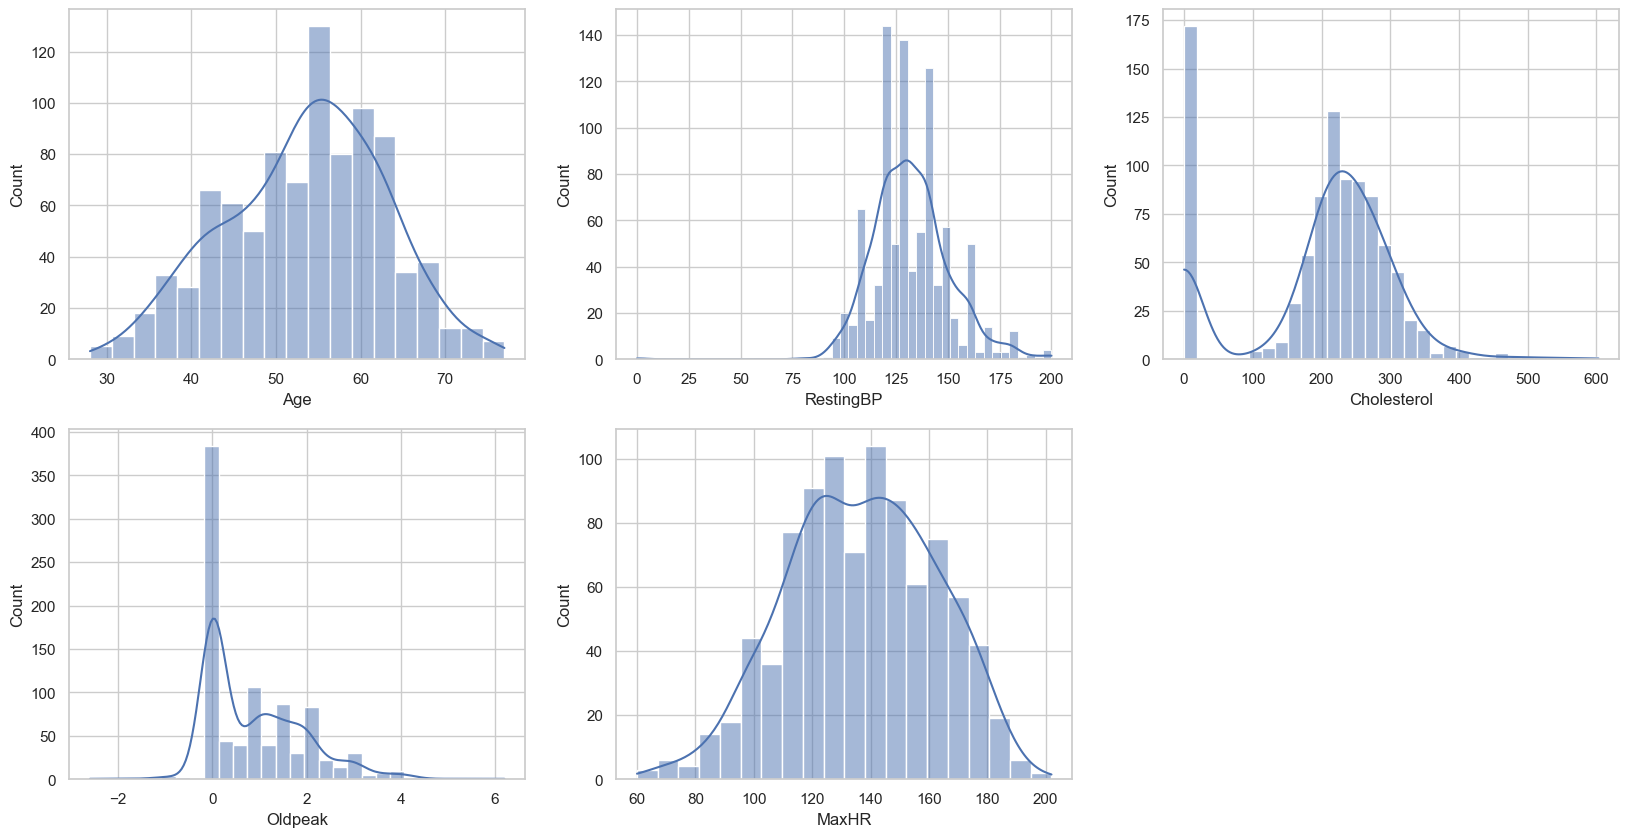

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))

sns.histplot(data = heart, x = 'Age', kde=True, ax = axs[0, 0])
sns.histplot(data = heart, x = 'RestingBP', kde=True, ax = axs[0, 1])
sns.histplot(data = heart, x = 'Cholesterol', kde=True, ax = axs[0, 2])
sns.histplot(data = heart, x = 'MaxHR', kde=True, ax = axs[1, 1])
sns.histplot(data = heart, x = 'Oldpeak', kde=True, ax = axs[1, 0])
axs[1, 2].axis('off')

### Cholesterol cannot have a value of 0 - these are data deficiencies. For Oldpeak the distribution is correct.

In [23]:
heart = heart.drop(heart[heart['RestingBP'] == 0].index) # I remove the only null value in this column
heart[heart['RestingBP'] == 0] # successfully removed

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome


In [24]:
heart[(heart['Cholesterol'] == 0) & (heart['Outcome'] == 1)].count() # there are as many as 151 lines where Cholesterol == 0 for sick people
# I would replace it with the median vilified of the remaining sick people

Age               151
Sex               151
ChestPainType     151
RestingBP         151
Cholesterol       151
FastingBS         151
RestingECG        151
MaxHR             151
ExerciseAngina    151
Oldpeak           151
ST_Slope          151
Outcome           151
dtype: int64

In [25]:
heart[(heart['Cholesterol'] == 0) & (heart['Outcome'] == 0)].count() # there are 20 lines for healthy people, where Cholesterol is equal to 0
# I would delete these lines; they will not cause significant data loss

Age               20
Sex               20
ChestPainType     20
RestingBP         20
Cholesterol       20
FastingBS         20
RestingECG        20
MaxHR             20
ExerciseAngina    20
Oldpeak           20
ST_Slope          20
Outcome           20
dtype: int64

### In heart1, I remove zero values for healthy patients only, and for sick patients, I replace with the median calculated for sick patients.
### In heart2, I remove all zero values.

In [26]:
heart1 = heart.copy(deep = True) # I copy the data before deleting and changing the data

In [27]:
heart2 = heart.copy(deep = True) # I make another copy of the data and in this copy I will remove all null values

In [28]:
heart1 = heart1.drop(heart1[(heart1['Cholesterol'] == 0) & (heart1['Outcome'] == 0)].index)
heart1[(heart1['Cholesterol'] == 0) & (heart1['Outcome'] == 0)] # successfully removed

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome


In [29]:
heart1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             897 non-null    int64  
 1   Sex             897 non-null    int8   
 2   ChestPainType   897 non-null    int8   
 3   RestingBP       897 non-null    int64  
 4   Cholesterol     897 non-null    int64  
 5   FastingBS       897 non-null    int64  
 6   RestingECG      897 non-null    int8   
 7   MaxHR           897 non-null    int64  
 8   ExerciseAngina  897 non-null    int8   
 9   Oldpeak         897 non-null    float64
 10  ST_Slope        897 non-null    int8   
 11  Outcome         897 non-null    int64  
dtypes: float64(1), int64(6), int8(5)
memory usage: 60.4 KB


In [30]:
# I remove all lines where Cholesterol == 0
heart2 = heart2[heart2['Cholesterol'] != 0]
heart2.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
Outcome           0
dtype: int64

In [31]:
# I change the values of 0 to the median
median_chol = heart1[(heart1['Cholesterol'] != 0) & (heart1['Outcome'] == 1)]['Cholesterol'].median()
print('Mediana:', median_chol)
heart1.loc[(heart1['Cholesterol'] == 0) & (heart1['Outcome'] == 1), 'Cholesterol'] = median_chol
print(heart1.isnull().sum())
heart1[(heart1['Cholesterol'] == 0) & (heart1['Outcome'] == 1)]

Mediana: 246.0
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
Outcome           0
dtype: int64


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome


## Analysis of results for heart1 -> with replacement of zero values by median for Cholesterol

(0.0, 1.0, 0.0, 1.0)

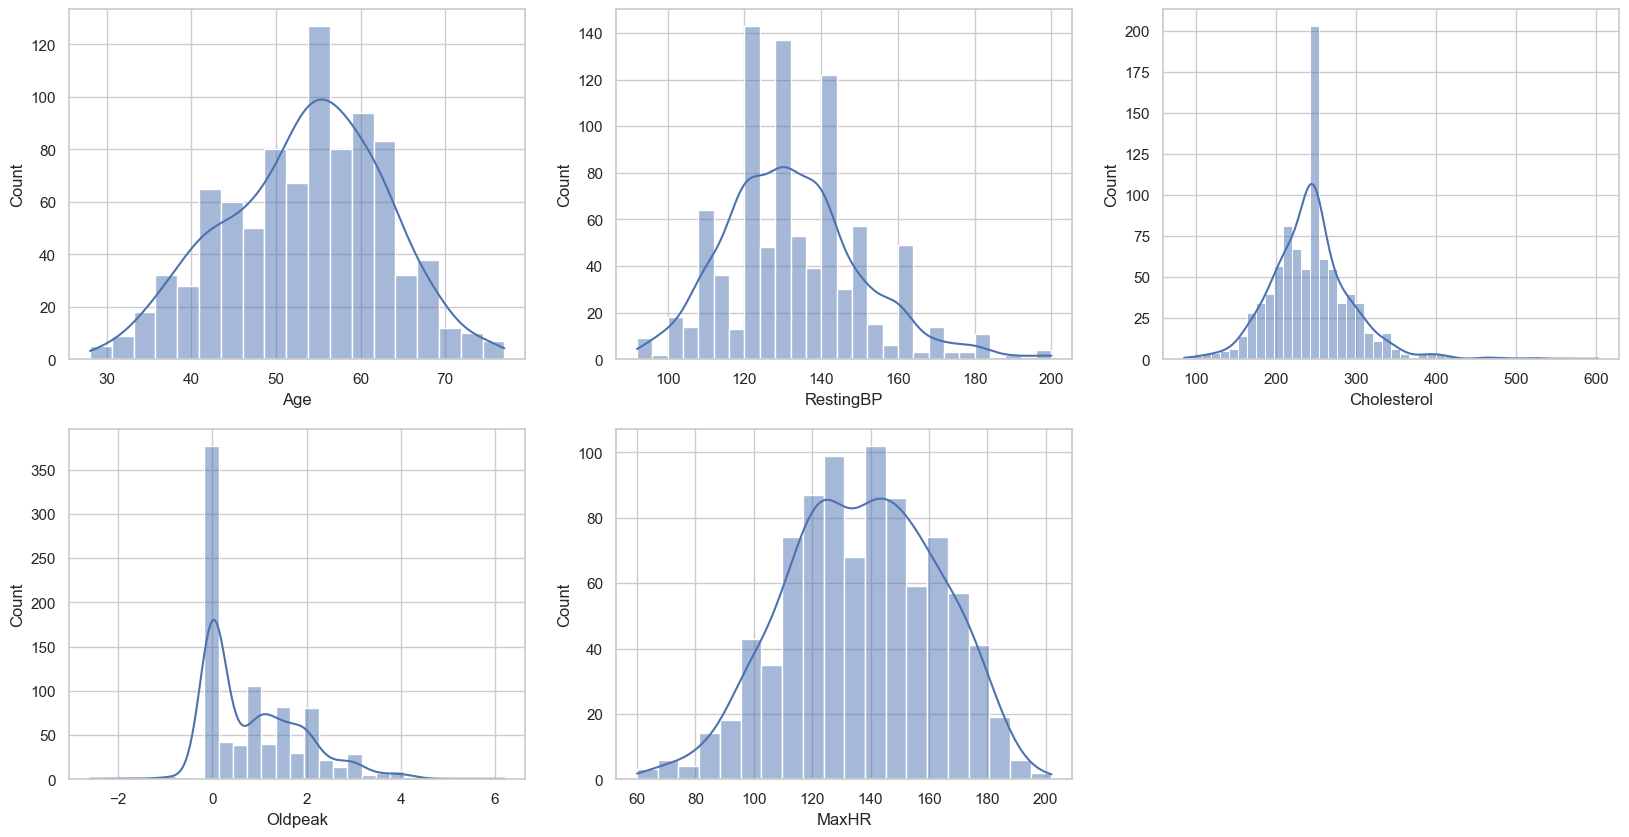

In [32]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))

sns.histplot(data = heart1, x = 'Age', kde=True, ax = axs[0, 0])
sns.histplot(data = heart1, x = 'RestingBP', kde=True, ax = axs[0, 1])
sns.histplot(data = heart1, x = 'Cholesterol', kde=True, ax = axs[0, 2])
sns.histplot(data = heart1, x = 'MaxHR', kde=True, ax = axs[1, 1])
sns.histplot(data = heart1, x = 'Oldpeak', kde=True, ax = axs[1, 0])
axs[1, 2].axis('off')

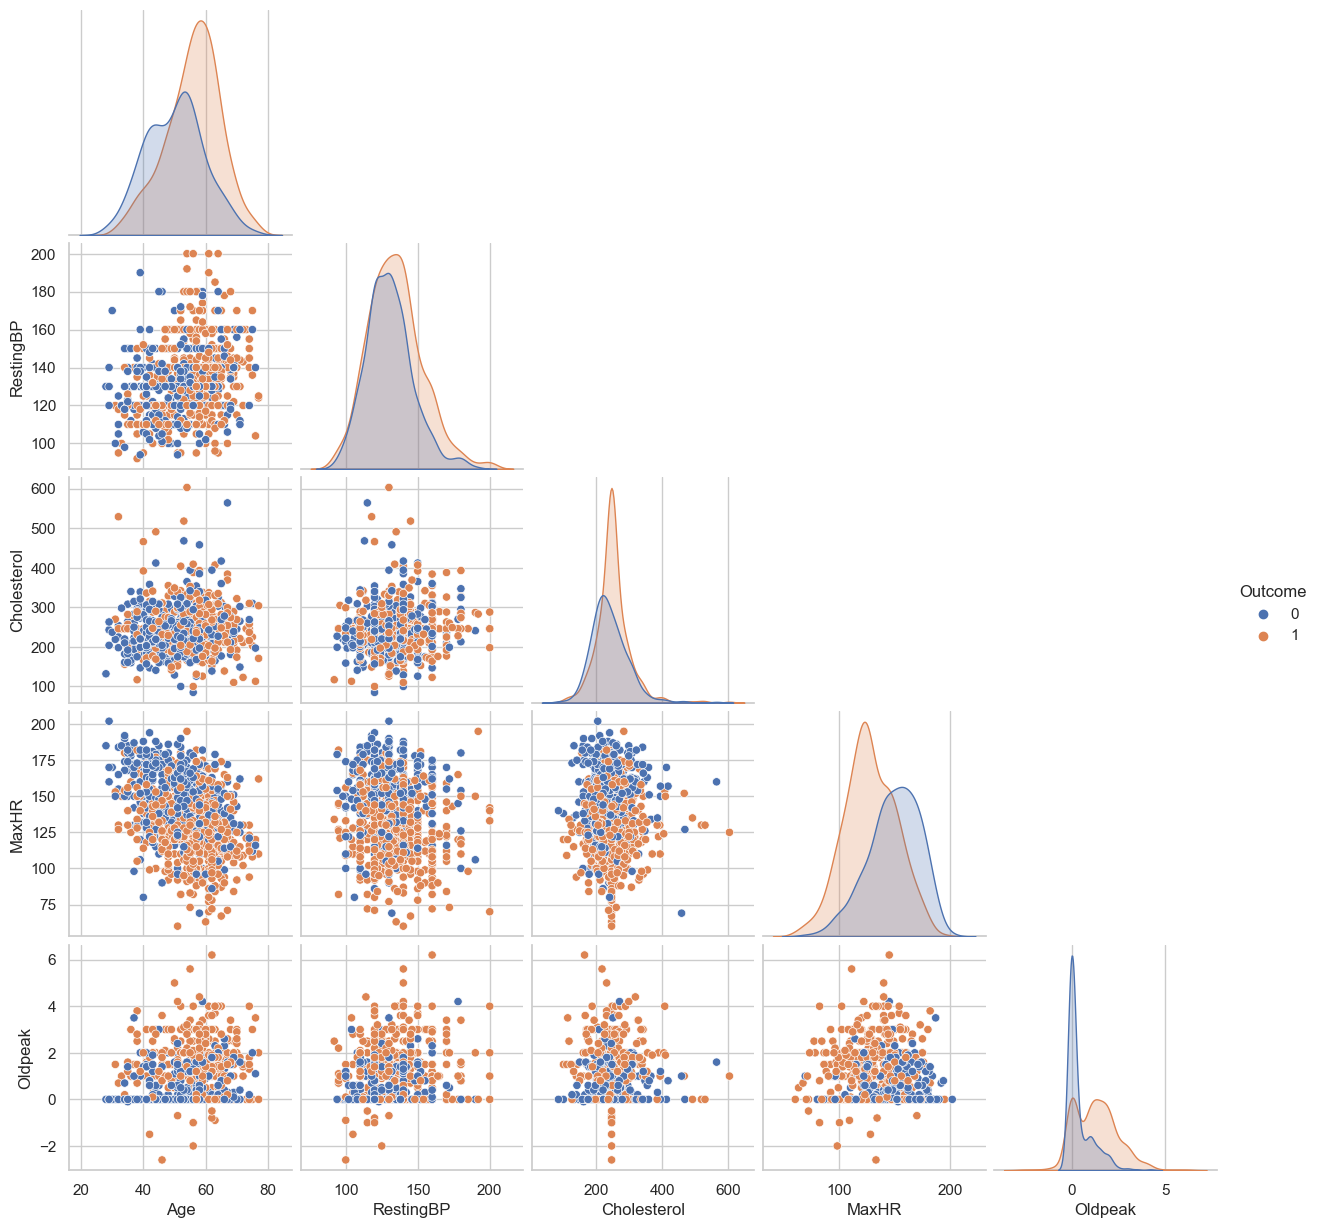

In [33]:
# sns.pairplot(heart)
numerical_out = heart1[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Outcome']]
sns.pairplot(data = numerical_out, hue = 'Outcome', corner = True, diag_kind = 'kde')

Text(0.5, 1.0, 'Heatmap correlation')

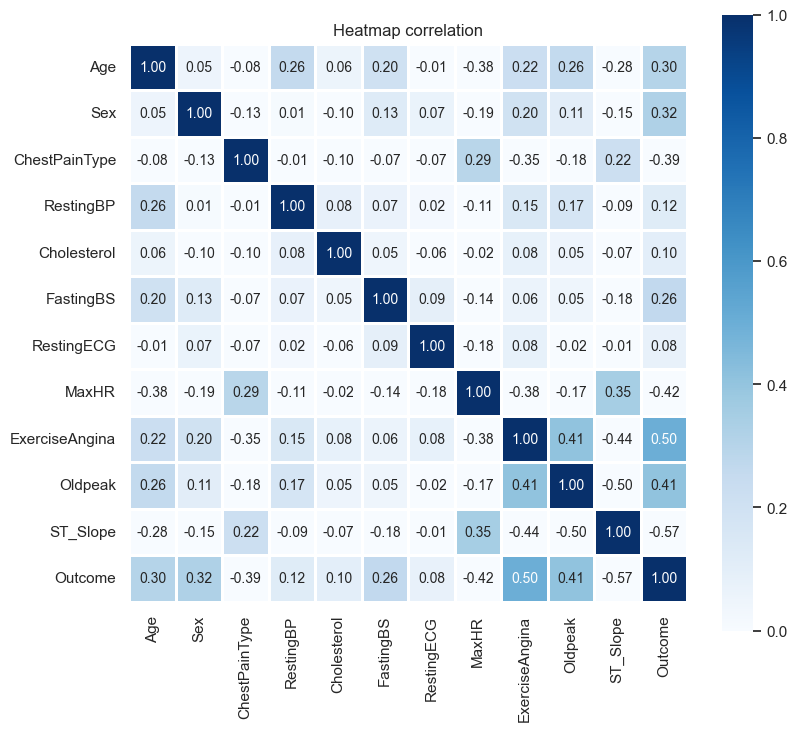

In [34]:
corr = heart1.corr()
plt.figure(figsize = (9, 8))
hm = sns.heatmap(corr, annot=True, linewidths=2, fmt='.2f', annot_kws={'size': 10}, vmax=1, vmin=0, square=True, cmap='Blues')
plt.title("Heatmap correlation")

### Correlations:
### Very weak for most features. Oldpeak and ExerciseAngina (0.41), Outcome and ExerciseAngina (0.50), Oldpeak and Outcome (0.41). But I should look at the numeric features. ST_Slope and MaxHR (0.35).

<Axes: >

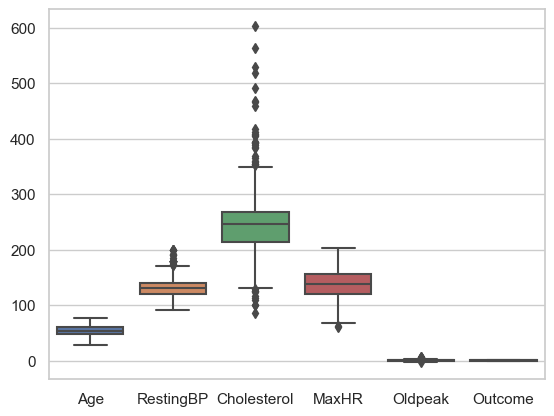

In [35]:
sns.boxplot(numerical_out)

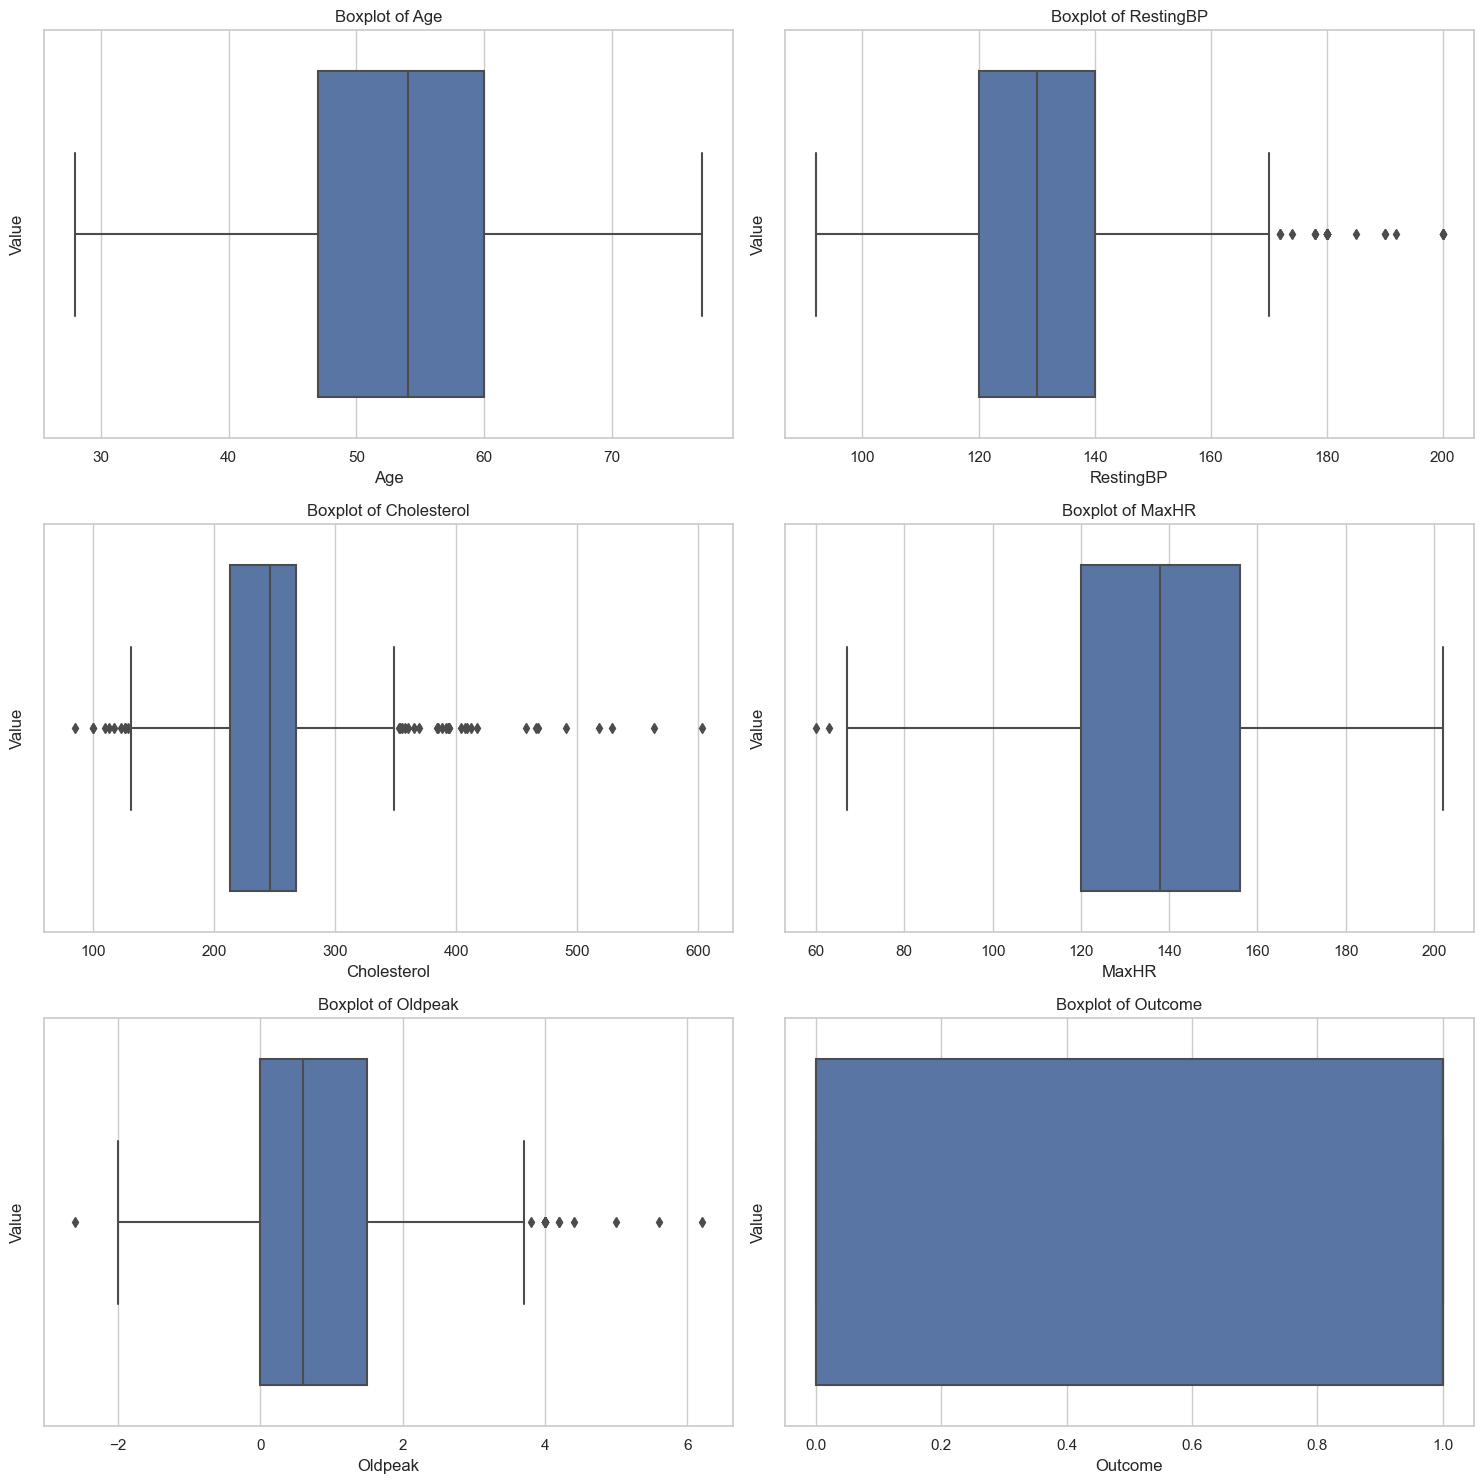

In [36]:
num_columns = len(numerical_out.columns)
num_rows = num_columns // 2 + num_columns % 2

plt.figure(figsize=(15, num_rows * 5))

for idx, column in enumerate(numerical_out.columns):
    plt.subplot(num_rows, 2, idx + 1)
    sns.boxplot(data=numerical_out, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

plt.tight_layout()

In [37]:
# np.sort(heart1['Cholesterol'].unique()) 

In [38]:
heart1[heart1['Cholesterol'] == 603] # probable result for the sick person

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome
149,54,1,0,130,603,1,1,125,1,1.0,1,1


### Outliers do not appear to be errors. These are realistic laboratory test results. That's why I wouldn't remove outliers.

## Analysis for heart2 -> with outliers removed

(0.0, 1.0, 0.0, 1.0)

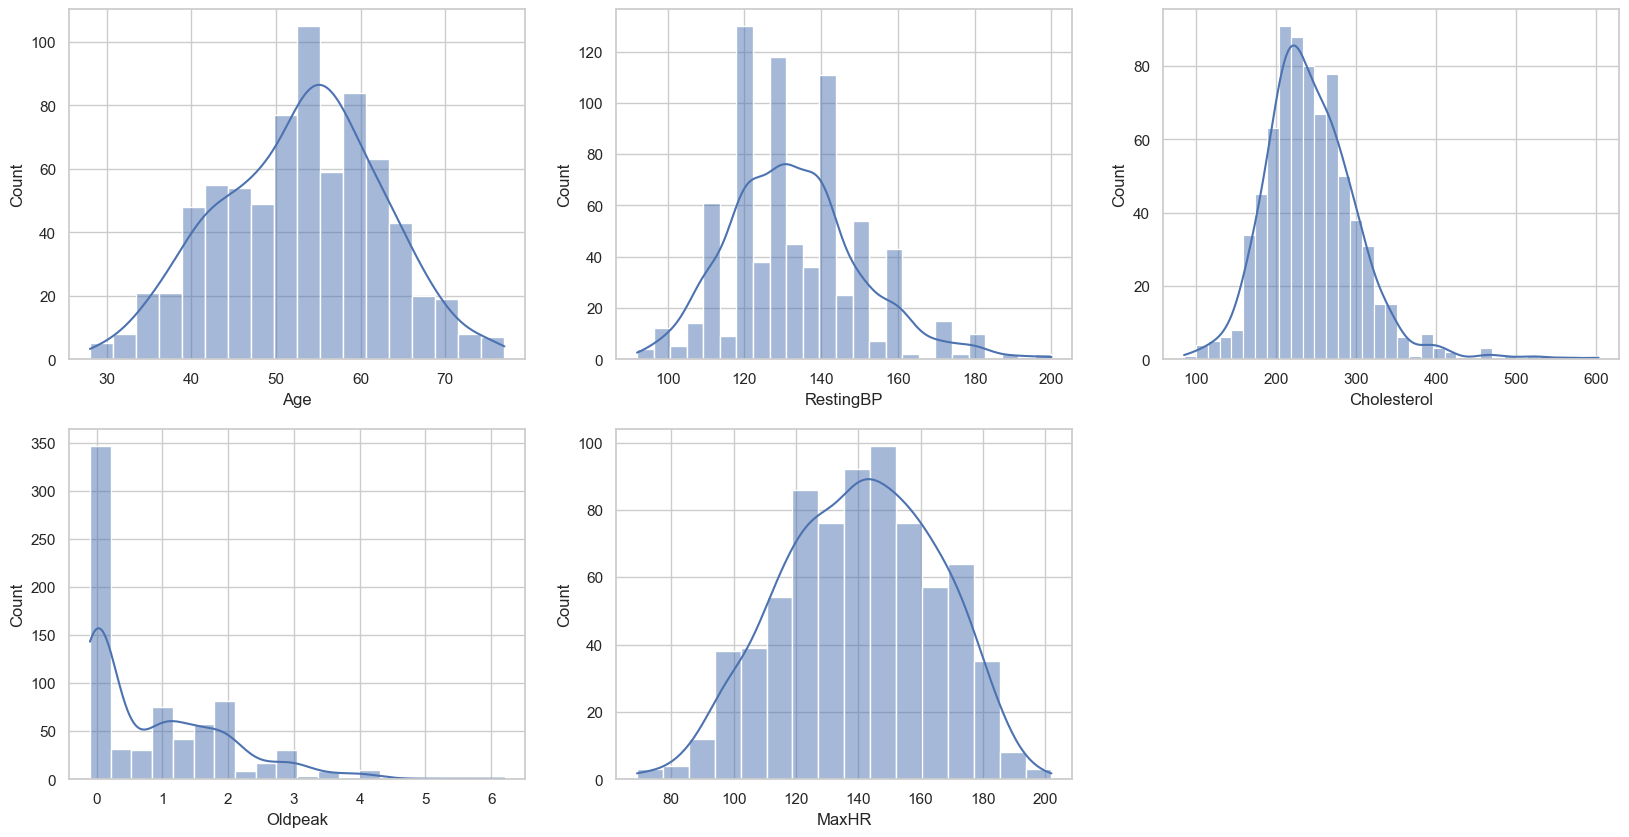

In [39]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))

sns.histplot(data = heart2, x = 'Age', kde=True, ax = axs[0, 0])
sns.histplot(data = heart2, x = 'RestingBP', kde=True, ax = axs[0, 1])
sns.histplot(data = heart2, x = 'Cholesterol', kde=True, ax = axs[0, 2])
sns.histplot(data = heart2, x = 'MaxHR', kde=True, ax = axs[1, 1])
sns.histplot(data = heart2, x = 'Oldpeak', kde=True, ax = axs[1, 0])
axs[1, 2].axis('off')

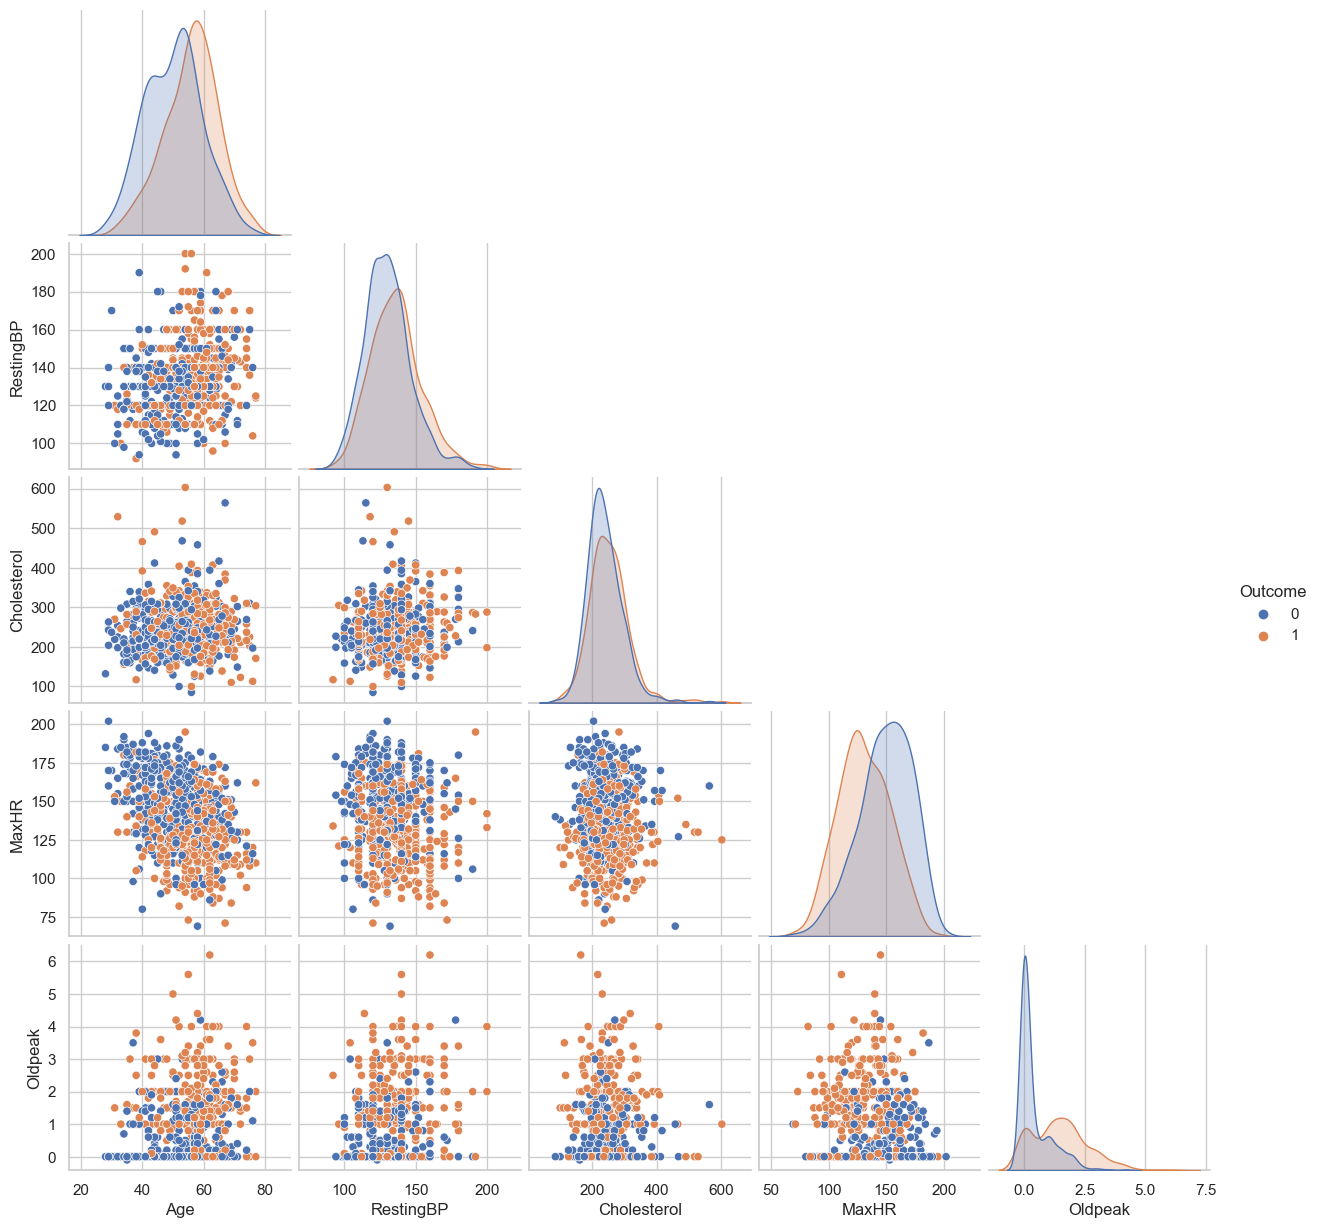

In [40]:
# sns.pairplot(heart)
numerical_outcome = heart2[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Outcome']]
sns.pairplot(data = numerical_outcome, hue = 'Outcome', corner = True, diag_kind = 'kde')

Text(0.5, 1.0, 'Heatmap correlation')

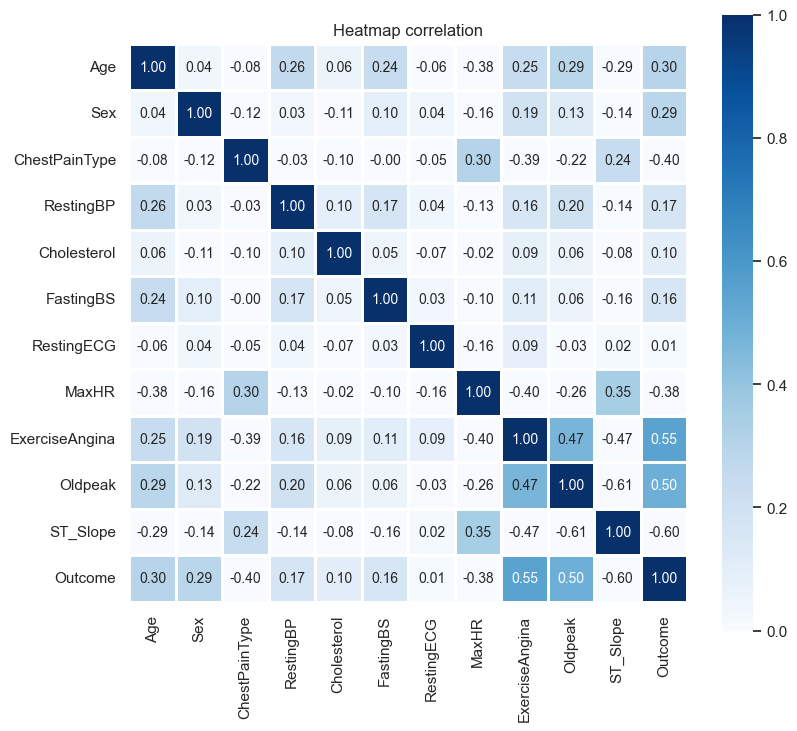

In [41]:
corr = heart2.corr()
plt.figure(figsize = (9, 8))
hm = sns.heatmap(corr, annot=True, linewidths=2, fmt='.2f', annot_kws={'size': 10}, vmax=1, vmin=0, square=True, cmap='Blues')
plt.title("Heatmap correlation")

### Correlations:
### Slightly better than heart1, but still weak. Oldpeak and ExerciseAngina (0.47), Outcome and ExerciseAngina (0.55), Oldpeak and Outcome (0.50). ST_Slope and MaxHR (0.35).

In [42]:
# saving data for modeling
heart1.to_csv('heart_mediana.csv', index = False)
heart2.to_csv('heart_out.csv', index = False)

### Analysis complete.